In [8]:
#БИБЛИОТЕКИ
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
#ЗАГРУЗКА ДАННЫХ
df = pd.read_csv("garments_worker_productivity.csv", delimiter = ',')

In [10]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [11]:
#УДАЛЕНИЕ ТЕКСТОВЫХ ПОЛЕЙ И ПОЛЯ С ДАТОЙ
df = df.drop(['date', 'quarter', 'day', 'wip'], axis=1)

In [12]:
df.head()

,department,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,sweing,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,finishing,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,sweing,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,sweing,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,sweing,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


In [13]:
#ЗАМЕНА ЗНАЧЕНИЙ У department
df['department'].replace({0: 'sweing', 1: 'finishing'}, inplace=True)

In [14]:
#РАЗДЕЛЕНИЕ НА ПРИЗНАКИ И ЦЕЛЕВУЮ ПЕРЕМЕННУЮ
X = df.drop(columns=['department'])
y = df['department']

In [15]:
#РАЗДЕЛЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
#МОДЕЛЬ БУСТИНГА
model = GradientBoostingClassifier(random_state=42)

In [17]:
#ОБУЧЕНИЕ МОДЕЛИ
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [18]:
#ПРЕДСКАЗАНИЕ(НА ТЕСТОВОЙ ВЫБОРКЕ)
y_pred = model.predict(X_test)

In [21]:
#ОЦЕНКА КАЧЕСТВА(ТОЧНОСТИ) МОДЕЛИ
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 93.61%


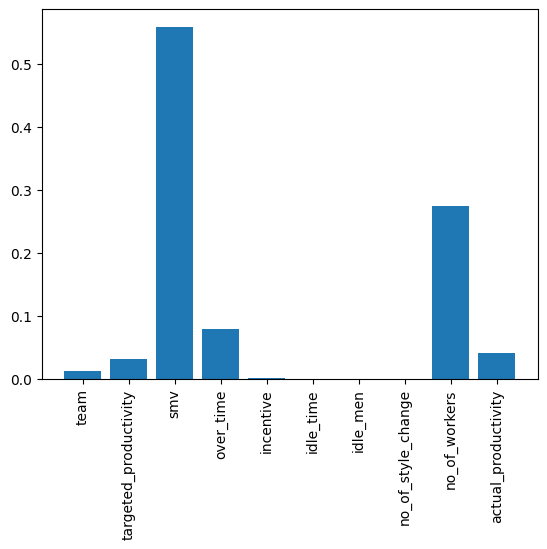

In [22]:
#ВАЖНОСТЬ ПРИЗНАКОВ В ВИДЕ СТОЛБЧАТОЙ ДИАГРАММЫ
importance = model.feature_importances_
plt.bar([x for x in X.columns], importance)
plt.xticks(rotation='vertical')
plt.show()